<a href="https://colab.research.google.com/github/keremshns/tensorflow_developer/blob/main/mnist_handwritten_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
#LOAD/SPLIT/INSPECT DATA
(x_train, y_train), (x_test,y_test) = tf.keras.datasets.mnist.load_data()

num_train_images = len(x_train)
img_shape = x_train[0].shape
labels_shape = y_train.shape

print("There are ", num_train_images, "images.")
print("Shape of an image: ",img_shape)
print("There are ", num_train_images, "labels.",labels_shape)

There are  60000 images.
Shape of an image:  (28, 28)
There are  60000 labels. (60000,)


In [12]:
#HYPERPARAMETERS
epochs = 50
batch_size = 128      #128 (wo batch normalization at 128 neuron Dense), 128
lr = 3e-3               #3e-3, 1e-3

#Dense layers in model  1st/128-32,

In [13]:
#FUNCTION FOR NORMALIZATION
def normalizer(x_train, y_train, x_test, y_test):
  x_train = x_train/255.0
  x_test = x_test/255.0

  return (x_train, y_train), (x_test,y_test)


#FUNCTION FOR INSTANTIATING DATA GENERATOR OBJECTS
def create_generators(x_train, y_train, x_test, y_test):

  train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                           rotation_range=15,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                            shear_range=0.2,
                                                           zoom_range=0.1)

  val_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                          rotation_range=15,
                                                         width_shift_range=0.2,
                                                          height_shift_range=0.2,
                                                          shear_range=0.2,
                                                         zoom_range=0.1)
  return train_generator, val_generator





In [14]:
#RUN WHEN USING IMAGE DATA GENERATOR
#OBTAINING AUGMENTED DATA
train_generator, val_generator = create_generators(x_train, y_train, x_test, y_test)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

train_generator = train_generator.flow(x_train,
                                       y_train,
                                       batch_size=batch_size
                                       )

val_generator = val_generator.flow(x_test,
                                   y_test,
                                   batch_size=batch_size,
                                   )


In [ ]:
#RUN WHEN USING NORMALIZER
#JUST FOR PREPROCESSING THE DATA IF YOU DONT WANT TO USE IMAGE GENERATOR
(x_train, y_train), (x_test, y_test) = normalizer(x_train, y_train, x_test, y_test)

In [8]:
model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(64, (5,5), input_shape=(28,28,1), padding="same"),
        tf.keras.layers.ReLU(negative_slope=0.01),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (5,5), padding="same"),
        tf.keras.layers.ReLU(negative_slope=0.01),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (5,5), padding="same"),
        tf.keras.layers.ReLU(negative_slope=0.01),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.Dense(256),
        tf.keras.layers.ReLU(negative_slope=0.01),
        tf.keras.layers.BatchNormalization(),                  #faster learning but worse at validation set
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.ReLU(negative_slope=0.01),
        tf.keras.layers.Dense(10, activation="softmax"),

])

model.summary()

callback = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/10))

optimizer = tf.keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator, callbacks=[callback])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1664      
                                                                 
 re_lu (ReLU)                (None, 28, 28, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        51232     
                                                                 
 re_lu_1 (ReLU)              (None, 14, 14, 32)        0

Epoch 1/50
938/938 [==============================] - 39s 27ms/step - loss: 0.5343 - accuracy: 0.8380 - val_loss: 0.1555 - val_accuracy: 0.9531 - lr: 1.0000e-04
Epoch 2/50
938/938 [==============================] - 24s 26ms/step - loss: 0.1396 - accuracy: 0.9577 - val_loss: 0.1367 - val_accuracy: 0.9550 - lr: 1.2589e-04
Epoch 3/50
938/938 [==============================] - 24s 26ms/step - loss: 0.0992 - accuracy: 0.9691 - val_loss: 0.0824 - val_accuracy: 0.9742 - lr: 1.5849e-04
Epoch 4/50
938/938 [==============================] - 25s 26ms/step - loss: 0.0828 - accuracy: 0.9737 - val_loss: 0.0605 - val_accuracy: 0.9802 - lr: 1.9953e-04
Epoch 5/50
938/938 [==============================] - 24s 26ms/step - loss: 0.0717 - accuracy: 0.9777 - val_loss: 0.1110 - val_accuracy: 0.9626 - lr: 2.5119e-04
Epoch 6/50
938/938 [==============================] - 24s 26ms/step - loss: 0.0655 - accuracy: 0.9791 - val_loss: 0.0546 - val_accuracy: 0.9824 - lr: 3.1623e-04
Epoch 7/50
938/938 [==============

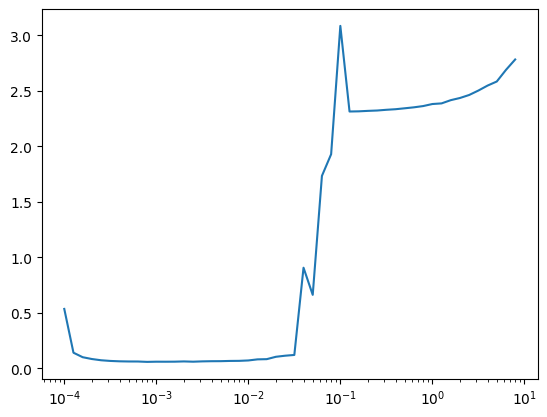

In [9]:
lr = history.history["lr"]
loss = history.history["loss"]
accuracy = history.history["accuracy"]

plt.semilogx(lr,loss)

In [ ]:
model = tf.keras.Sequential([

        tf.keras.layers.Conv2D(64, (5,5), input_shape=(28,28,1), activation="relu", padding="same"),
        #tf.keras.layers.ReLU(negative_slope=0.01),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32, (5,5), activation="relu", padding="same"),
        #tf.keras.layers.ReLU(negative_slope=0.01),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(16, (5,5), activation="relu", padding="same"),
        #tf.keras.layers.ReLU(negative_slope=0.01),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.GlobalMaxPooling2D(),
        tf.keras.layers.Dense(256),
        #tf.keras.layers.ReLU(negative_slope=0.01),
        tf.keras.layers.BatchNormalization(),                  #faster learning but worse at validation set
        tf.keras.layers.Dense(128, activation="relu"),
        #tf.keras.layers.ReLU(negative_slope=0.01),
        tf.keras.layers.Dense(10, activation="softmax"),

])

model.summary()


optimizer = tf.keras.optimizers.Adam(lr=lr)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        51232     
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                      

Epoch 1/50
469/469 [==============================] - 27s 49ms/step - loss: 0.2125 - accuracy: 0.9326 - val_loss: 0.9743 - val_accuracy: 0.6114
Epoch 2/50
469/469 [==============================] - 23s 49ms/step - loss: 0.0717 - accuracy: 0.9779 - val_loss: 0.0818 - val_accuracy: 0.9735
Epoch 3/50
360/469 [======================>.......] - ETA: 4s - loss: 0.0586 - accuracy: 0.9824

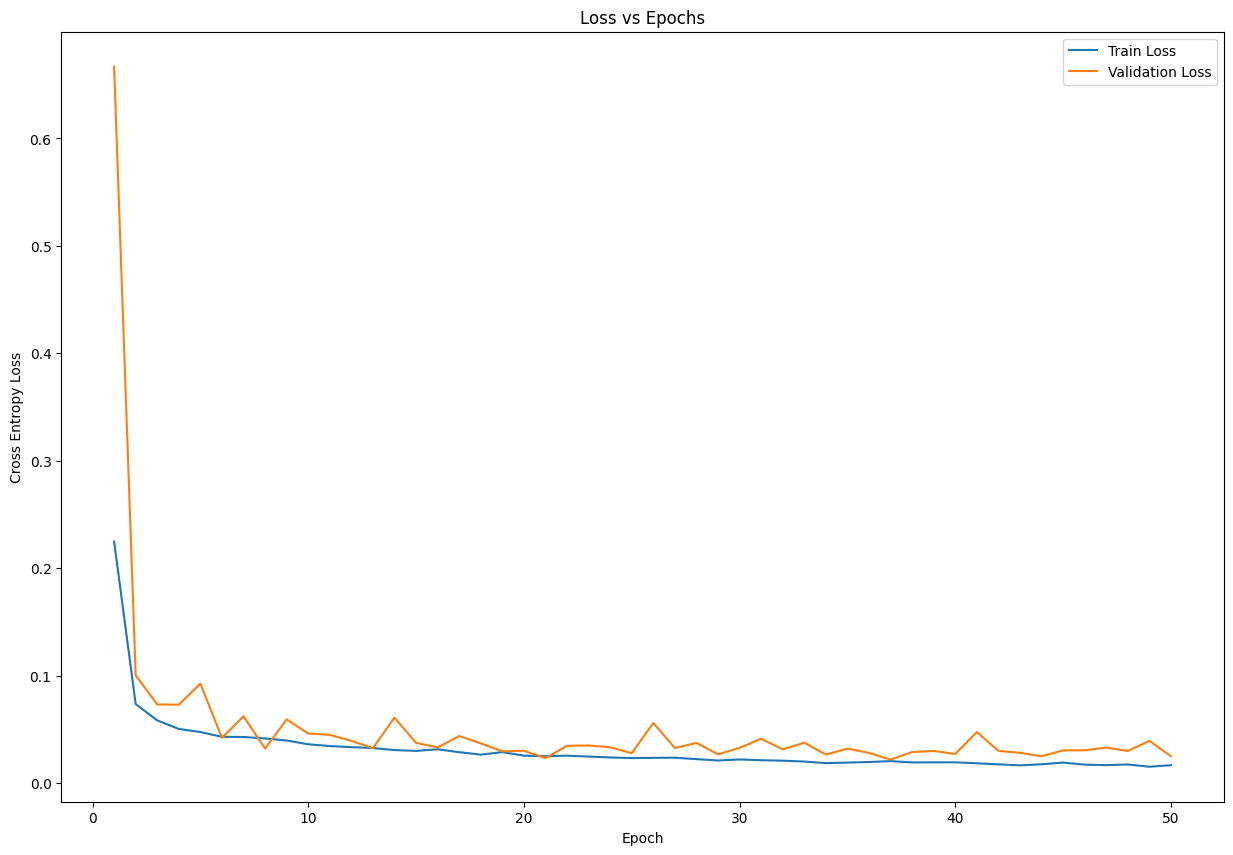

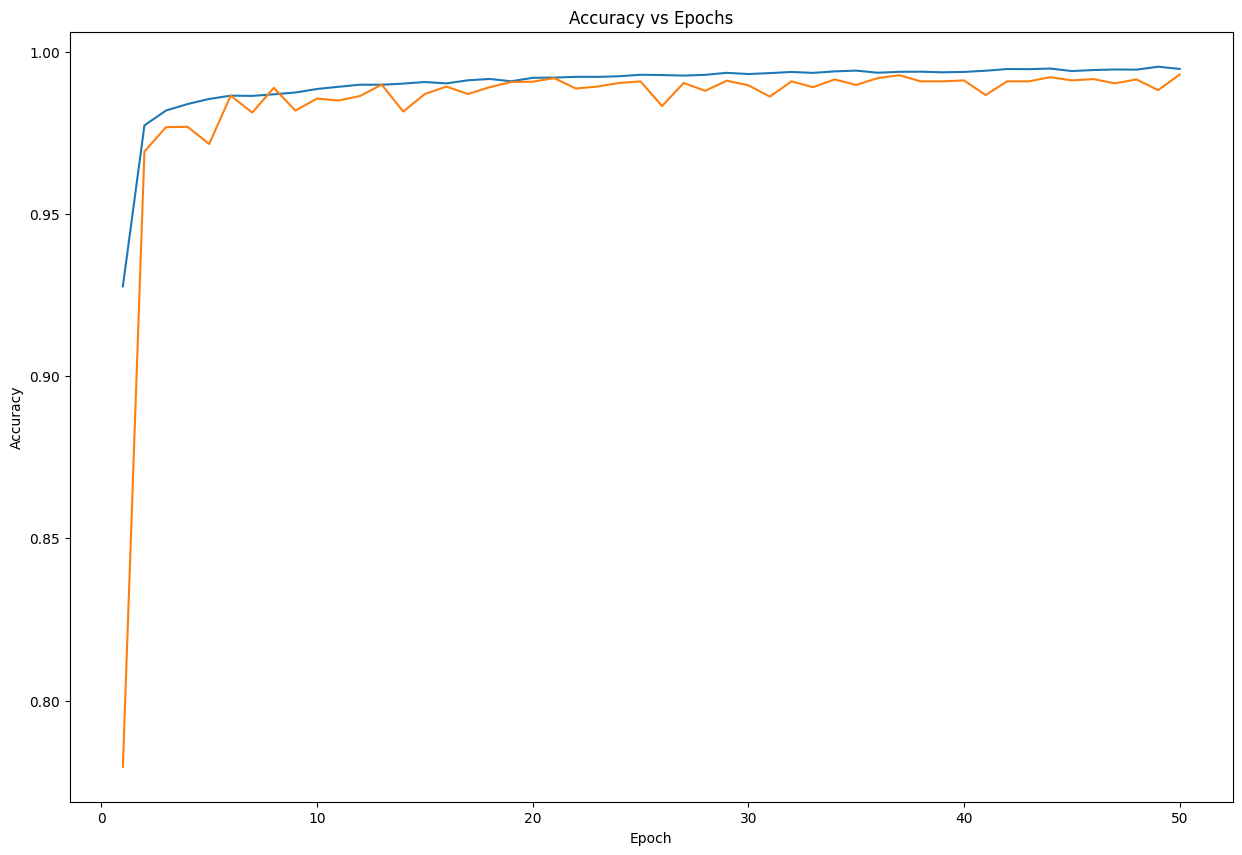

In [7]:
accuracy = history.history["accuracy"]
loss = history.history["loss"]
val_accuracy = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

#SMALL SEPERATE PLOTS
"""
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(range(epochs),accuracy)
plt.subplot(2,2,2)
plt.plot(range(epochs),loss)
plt.subplot(2,2,3)
plt.plot(range(epochs),val_accuracy)
plt.subplot(2,2,4)
plt.plot(range(epochs),val_loss)
plt.show()"""

#BIG PLOTS ON SAME GRAPH
plt.figure(figsize=(15,10))
plt.plot(range(1,epochs+1),loss,label='Train Loss')
plt.plot(range(1,epochs+1),val_loss,label='Validation Loss')
#plt.xlim(range(1,epochs+1))
plt.title('Loss vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

plt.figure(figsize=(15,10))
plt.plot(range(1,epochs+1),accuracy)
plt.plot(range(1,epochs+1),val_accuracy,label='Validation Accuracy')
#plt.xlim(range(1,epochs+1))
plt.title('Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

#SKLEARN METRICS CONFUSION GRAPH
